In [1]:
import pandas as pd
import glob
import numpy as np
import re

In [2]:
temp = glob.glob('C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/2_paper_info/*.csv')
temp


['C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/2_paper_info\\paper_information_2011.csv',
 'C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/2_paper_info\\paper_information_2012.csv',
 'C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/2_paper_info\\paper_information_2013.csv',
 'C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/2_paper_info\\paper_information_2014.csv',
 'C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/2_paper_info\\paper_information_2015.csv',
 'C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/2_paper_info\\paper_information_2019.csv',
 'C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/2_paper_info\\paper_information_2020.csv']

In [3]:
df_temp = []
for x in temp:
    tmp = pd.read_csv(x, encoding='utf-8')
    df_temp.append(tmp)
    
df = pd.concat(df_temp)

In [4]:
# citation column에서 연도 추출
def find_year(df):
    p = re.compile('^[0-9]{4}') # 숫자4자리로 시작하는 조건 
    df = df.split()
    for x in df:
        if p.match(x) != None:
            return x[:4]
    else:
        return np.nan

In [5]:
df['year'] = df['citation'].apply(find_year)

In [6]:
# concat으로 합쳐진 df의 index 초기화
df.reset_index(drop=True, inplace=True)
df[df.index == 0]

,citation,doi,PMCID,PMID,Title,Author,Belong,Abstract,Keywords,year
0,Int J Mol Sci. 2011; 12(5): 3205–3219.,10.3390/ijms12053205,PMC3116186,21686180.0,Novel Strategies for Drug Discovery Based on I...,Jihua Wang;Zanxia Cao;Liling Zhao;Shuqiang Li,1 Shandong Provincial Key Laboratory of Functi...,Intrinsically disordered proteins (IDPs) are p...,intrinsically disordered proteins;sequence cha...,2011


In [7]:
# citation에서 저널 분리
df['Journal'] = df['citation'].apply(lambda x : x.split('.')[0])
df.tail()

,citation,doi,PMCID,PMID,Title,Author,Belong,Abstract,Keywords,year,Journal
10317,Phys Rev E. 2020 Jan; 101(1-1): 012419.,10.1103/PhysRevE.101.012419,PMC7329163,32069653.0,Using Contact Statistics to Characterize Struc...,Priyojit Das;Rosela Golloshi;Rachel Patton McC...,1UT‐ORNL Graduate School of Genome Science and...,"As a unique subset of functional polymers, man...",NaN,2020,Phys Rev E
10318,Protein Cell. 2020 Mar; 11(3): 202–207.,10.1007/s13238-019-00680-y,PMC7026206,31894537.0,Phase separation of the C. elegans Polycomb pr...,Wenyan Qu;Zheng Wang;Hong Zhang,"1School of Life Sciences, University of Scienc...",Below is the link to the electronic supplement...,NaN,2020,Protein Cell
10319,Theranostics. 2020; 10(4): 1719–1732.,10.7150/thno.37049,PMC6993221,32042332.0,Silica Perturbs Primary Cilia and Causes Myofi...,Shifeng Li;Zhongqiu Wei;Gengxu Li;Qiaodan Zhan...,"1Medical Research Center, Hebei Key Laboratory...",Vectors encoding homo sapiens kinesin family m...,Primary cilia;Kinesin family member 3A;Glioma-...,2020,Theranostics
10320,Theranostics. 2020; 10(1): 201–217.,10.7150/thno.35895,PMC6929620,31903115.0,Musashi-1 promotes stress-induced tumor progre...,Hsiao-Yun Chen;Mong-Lien Wang;Benoit Laurent;C...,"1Division of Basic Research, Department of Med...",To decipher the molecular mechanisms by which ...,Musashi-1;Argonaute 2;RNA regulation;subcellul...,2020,Theranostics
10321,Toxins (Basel). 2020 Jan; 12(1): 27.,10.3390/toxins12010027,PMC7020413,31906409.0,Calcium-Induced Activity and Folding of a Repe...,Nur Shidaa Mohd Ali;Abu Bakar Salleh;Raja Noor...,1Enzyme and Microbial Technology Research Cent...,It is hypothesized that the Ca2+ ions were inv...,RTX lipase;AMS8 lipase;family I.3;RTX parallel...,2020,Toxins (Basel)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# notebook 표기
%matplotlib inline

import platform

# - 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 깨짐 방지
if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows' ):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else: 
    print('error')

c:\Users\meteo\anaconda3\envs\sesac\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


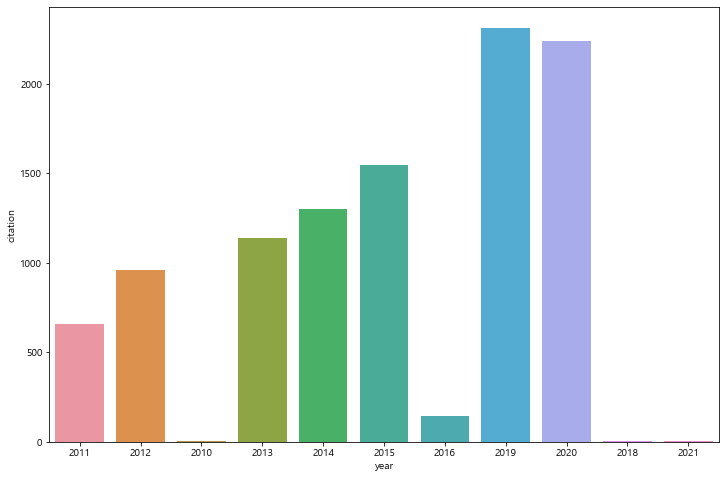

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(df['year'])
plt.xlabel('year')
plt.ylabel('citation')
plt.show()

In [10]:
journal = df['Journal'].value_counts(ascending=False)[:10].to_frame()
journal.reset_index(inplace=True)
journal

,index,Journal
0,PLoS One,602
1,J Biol Chem,549
2,Proc Natl Acad Sci U S A,433
3,Sci Rep,367
4,Int J Mol Sci,355
5,Nucleic Acids Res,325
6,Nat Commun,265
7,Biophys J,255
8,Biochemistry,169
9,eLife,167


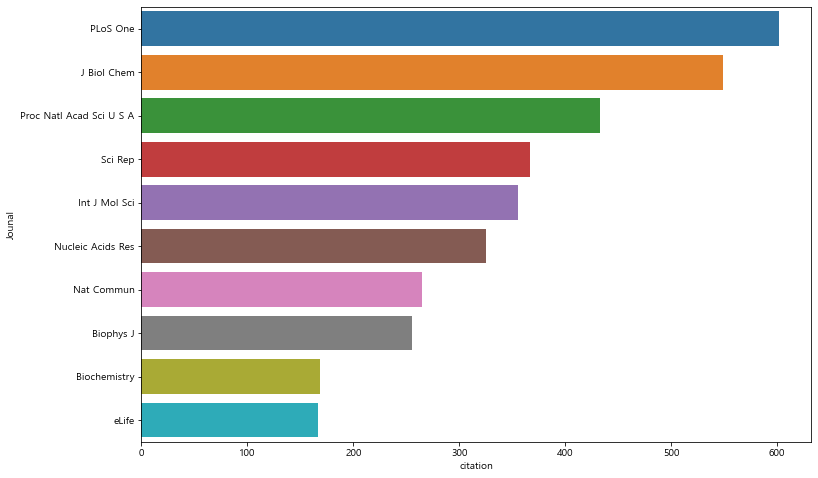

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(y='index', x='Journal', data=journal)
plt.xlabel('citation')
plt.ylabel('Jounal')
plt.show()

## 첨부파일 이름의 연도 기준이 아닌 citation 연도 기준으로 year 값 찾기(연습)

In [12]:
df['year2'] = df['citation'].apply(lambda x : x.split('.')[1].strip()[:4])
df['year2'].value_counts()

2019    2307
2020    2226
2015    1539
2014    1297
2013    1136
2012     958
2011     656
2016     144
F100      21
bioR       9
2018       7
2021       6
: 10       2
Chem       2
2010       2
Nove       1
Octo       1
medR       1
Gate       1
: RE       1
PLoS       1
9(1)       1
           1
Dece       1
Febr       1
Name: year2, dtype: int64

In [13]:
year2_sample = df['year2'].value_counts()[-13:].index.tolist()
check_sample = []

# 연도 추출 시 실제 연도가 아닌 값들을 걸러내 변수에 저장
for x in year2_sample:
    p = re.compile('[0-9]{4}')
    if p.match(x) == None:
        check_sample.append(x)
        
len(check_sample)

12

In [14]:
check_sample

[': 10',
 'Chem',
 'Nove',
 'Octo',
 'medR',
 'Gate',
 ': RE',
 'PLoS',
 '9(1)',
 '',
 'Dece',
 'Febr']

In [15]:
# 예외 값 확인
df[df['year2'].apply(lambda x : True if x in check_sample else False)]

,citation,doi,PMCID,PMID,Title,Author,Belong,Abstract,Keywords,year,Journal,year2
1360,Phys Biol. 9(1): 10.1088/1478-3975/9/1/014001.,10.1088/1478-3975/9/1/014001,PMC3783528,22314977.0,The Importance of Slow Motions for Protein Fun...,Aris Skliros;Michael T. Zimmermann;Debkanta Ch...,1L. H. Baker Center for Bioinformatics and Bio...,Loops in proteins connect secondary structures...,NaN,NaN,Phys Biol,9(1)
1396,Infect Disord Drug Targets.,NaN,PMC3695056,23167715.0,Advances in Mycobacterium tuberculosis therape...,Nicholas Chim;Cedric P. Owens;Heidi Contreras;...,1Department of Molecular Biology and Biochemis...,"In 2012, tuberculosis (TB) remains a global he...",Tuberculosis;Mycobacterium tuberculosis;Protei...,NaN,Infect Disord Drug Targets,
1653,"Endocr Rev. December 1, 2012; 33(6): 981–1030.",10.1210/er.2011-1034,PMC5393155,23065822.0,Insulin Resistance and the Polycystic Ovary Sy...,Evanthia Diamanti-Kandarakis;Andrea Dunaif,"Medical School, University of Athens (E.D.-K.)...",Polycystic ovary syndrome (PCOS) is now recogn...,NaN,2012,Endocr Rev,Dece
2114,Version 1. PLoS Curr. 2013 November 13; 5: ecu...,10.1371/currents.outbreaks.22254b58675cdebc256...,PMC3828228,24270586.0,Prediction of Intrinsic Disorder in MERS-CoV/H...,Gerard Kian-Meng Goh;A. Keith Dunker;Vladimir ...,"Gerard Kian-Meng Goh, Goh's BioComputing, Sin...","A novel coronavirus, MERS-CoV (NCoV, HCoV-EMC/...",NaN,2013,Version 1,PLoS
2712,Cell Mol Life Sci. : 10.1007/s00018-013-1475-1.,10.1007/s00018-013-1475-1,PMC3969452,24077895.0,Endothelial Signaling and the Molecular Basis ...,Deepak Atri;Bruno Larrivée;Anne Eichmann;Micha...,"1Yale Cardiovascular Research Center, Section ...",Arteriovenous malformations occur when abnorma...,Arteriovenous malformation;Notch;TGFβ;DLL4;ALK...,NaN,Cell Mol Life Sci,: 10
6335,Eur J Neurosci. : 10.1111/ejn.14354.,10.1111/ejn.14354,PMC6661010,30687965.0,Principles of the animal molecular clock learn...,Jennifer J. Loros,"Department of Biochemistry and Cell Biology, D...","Study of Neurospora, a model system evolutiona...",WCC;FRQ;Input;Oscillator;Output,NaN,Eur J Neurosci,: 10
7349,Version 2. Gates Open Res. 2019; 3: 6.,10.12688/gatesopenres.12899.2,PMC6480449,31131369.0,Aerosol delivery of dry powder synthetic lung ...,Frans J. Walther;Monik Gupta;Michael M. Lipp;H...,"\n1Department of Pediatrics, Los Angeles Biome...","In this revision, we implemented the thoughtfu...",Dry Powder synthetic lung surfactant;Surfactan...,2019,Version 2,Gate
7449,Reproduction. : REP-18-0440.R1.,10.1530/REP-18-0440,PMC6602873,30608903.0,Emerging Role for SRC family kinases in juncti...,Xiang Xiao;Yue Yang;Baiping Mao;C. Yan Cheng;Y...,"1Department of Reproductive Physiology, Zhejia...",SRC family kinases (SFKs) are known regulators...,NaN,NaN,Reproduction,: RE
8070,Assay Drug Dev Technol. November/December 201...,10.1089/adt.2019.940,PMC6921095,31502857.0,Assays to Interrogate the Ability of Compounds...,Ashley T. Fancher;Yun Hua;Christopher J. Stroc...,"1Department of Pharmaceutical Sciences, School...",Prostate cancer is the leading cause of cancer...,androgen receptor activation function domains;...,2019,Assay Drug Dev Technol,Nove
8350,Version 1. medRxiv. Preprint. 2020 Oct 27.,10.1101/2020.10.26.20219584,PMC7605585,33140072.0,The spatio-temporal landscape of lung patholog...,André Figueiredo Rendeiro;Hiranmayi Ravichandr...,"1Institute for Computational Biomedicine, Weil...",Recent studies have provided insights into the...,COVID-19;immunology;infection biology;spatial-...,2020,Version 1,medR


In [16]:
for idx, x in enumerate(df['citation'][1653].split()):
    p = re.compile('^[0-9]{4}')
    if p.match(x) != None:
        print(idx, p.match(x))

4 <re.Match object; span=(0, 4), match='2012'>


In [17]:
def find_year(df):
    p = re.compile('^[0-9]{4}')
    df = df.split()
    for x in df:
        if p.match(x) != None:
            return x[:4]
    else:
        return np.nan

In [18]:
df['citation'].apply(find_year).value_counts()

2019    2315
2020    2243
2015    1546
2014    1299
2013    1140
2012     959
2011     656
2016     144
2018       7
2021       6
2010       2
Name: citation, dtype: int64

In [19]:
df['citation'].apply(find_year)

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10317    2020
10318    2020
10319    2020
10320    2020
10321    2020
Name: citation, Length: 10322, dtype: object

In [20]:
df['year3'] = df['citation'].apply(find_year)

In [21]:
df[df['year3'].isnull()==True]

,citation,doi,PMCID,PMID,Title,Author,Belong,Abstract,Keywords,year,Journal,year2,year3
1360,Phys Biol. 9(1): 10.1088/1478-3975/9/1/014001.,10.1088/1478-3975/9/1/014001,PMC3783528,22314977.0,The Importance of Slow Motions for Protein Fun...,Aris Skliros;Michael T. Zimmermann;Debkanta Ch...,1L. H. Baker Center for Bioinformatics and Bio...,Loops in proteins connect secondary structures...,NaN,NaN,Phys Biol,9(1),NaN
1396,Infect Disord Drug Targets.,NaN,PMC3695056,23167715.0,Advances in Mycobacterium tuberculosis therape...,Nicholas Chim;Cedric P. Owens;Heidi Contreras;...,1Department of Molecular Biology and Biochemis...,"In 2012, tuberculosis (TB) remains a global he...",Tuberculosis;Mycobacterium tuberculosis;Protei...,NaN,Infect Disord Drug Targets,,NaN
2712,Cell Mol Life Sci. : 10.1007/s00018-013-1475-1.,10.1007/s00018-013-1475-1,PMC3969452,24077895.0,Endothelial Signaling and the Molecular Basis ...,Deepak Atri;Bruno Larrivée;Anne Eichmann;Micha...,"1Yale Cardiovascular Research Center, Section ...",Arteriovenous malformations occur when abnorma...,Arteriovenous malformation;Notch;TGFβ;DLL4;ALK...,NaN,Cell Mol Life Sci,: 10,NaN
6335,Eur J Neurosci. : 10.1111/ejn.14354.,10.1111/ejn.14354,PMC6661010,30687965.0,Principles of the animal molecular clock learn...,Jennifer J. Loros,"Department of Biochemistry and Cell Biology, D...","Study of Neurospora, a model system evolutiona...",WCC;FRQ;Input;Oscillator;Output,NaN,Eur J Neurosci,: 10,NaN
7449,Reproduction. : REP-18-0440.R1.,10.1530/REP-18-0440,PMC6602873,30608903.0,Emerging Role for SRC family kinases in juncti...,Xiang Xiao;Yue Yang;Baiping Mao;C. Yan Cheng;Y...,"1Department of Reproductive Physiology, Zhejia...",SRC family kinases (SFKs) are known regulators...,NaN,NaN,Reproduction,: RE,NaN
